In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# reading the data
data = pd.read_json('/Users/yogeshdhaliya/Desktop/Task/loan_approval_dataset.json')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# Data Exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 26.9+ MB


In [6]:
df.shape

(252000, 13)

In [7]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [8]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

No missing values detected in the data

In [9]:
#Checking the unique values in the data
df.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

In [10]:
df.describe()  #Checking the summary statistics of the data

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### Categorical Variables

In [11]:
# check how many columns are categorical
for i in df.columns:
    if df[i].dtype == 'object':
        print(i)

Married/Single
House_Ownership
Car_Ownership
Profession
CITY
STATE


In [12]:
df["Married/Single"].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [13]:
df["House_Ownership"].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [14]:
df["Car_Ownership"].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [15]:
df["Profession"].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [16]:
df["CITY"].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [17]:
df["STATE"].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

Feature Selection - chi square test - to check association between categorical features and target feature

In [18]:
from scipy.stats import chi2_contingency      
for i in ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']:
    chi2, pval, _, _ = chi2_contingency(pd.crosstab(df[i], df['Risk_Flag']))
    print(i, '---', pval)

Married/Single --- 3.773053705715196e-26
House_Ownership --- 1.8381930028370595e-40
Car_Ownership --- 1.7350853850183746e-33
Profession --- 5.108641602000937e-98
CITY --- 0.0
STATE --- 2.0057472384130266e-136


Since all the categorical feature have p-value <=0.05, we will accept all

### Numerical Variables

In [19]:
# check how many columns are numerical
for i in df.columns:
    if df[i].dtype == 'int':
        print(i)

Id
Income
Age
Experience
CURRENT_JOB_YRS
CURRENT_HOUSE_YRS
Risk_Flag


In [20]:
from scipy.stats import pointbiserialr

# Calculate point biserial correlation for each integer variable
corr1, p_value1 = pointbiserialr(df['Income'], df['Risk_Flag'])
corr2, p_value2 = pointbiserialr(df['Age'], df['Risk_Flag'])
corr3, p_value3 = pointbiserialr(df['Experience'], df['Risk_Flag'])
corr4, p_value4 = pointbiserialr(df['CURRENT_JOB_YRS'], df['Risk_Flag'])
corr5, p_value5 = pointbiserialr(df['CURRENT_HOUSE_YRS'], df['Risk_Flag'])

print(f'Correlation between integer_variable1 and Target: {corr1}, p-value: {p_value1}')
print(f'Correlation between integer_variable2 and Target: {corr2}, p-value: {p_value2}')
print(f'Correlation between integer_variable2 and Target: {corr3}, p-value: {p_value3}')
print(f'Correlation between integer_variable2 and Target: {corr4}, p-value: {p_value4}')
print(f'Correlation between integer_variable2 and Target: {corr5}, p-value: {p_value5}')


Correlation between integer_variable1 and Target: -0.003091168122271239, p-value: 0.12072203190827889
Correlation between integer_variable2 and Target: -0.02180927605070088, p-value: 6.687623645092961e-28
Correlation between integer_variable2 and Target: -0.03452261289070651, p-value: 2.5475634857843415e-67
Correlation between integer_variable2 and Target: -0.01694158205212183, p-value: 1.8132212225854788e-17
Correlation between integer_variable2 and Target: -0.0043751630776717836, p-value: 0.028069472763846918


Interpretation of Results:
1. Income:
- Correlation: -0.0031
- p-value: 0.1207
- Interpretation: Weak correlation and not statistically significant (p > 0.05).

2. Age:

- Correlation: -0.0218
- p-value: 6.6876e-28
- Interpretation: Weak correlation but statistically significant (p < 0.05).

3. Experience:
- Correlation: -0.0345
- p-value: 2.5476e-67
- Interpretation: Weak correlation but statistically significant (p < 0.05).

4. CURRENT_JOB_YRS:
- Correlation: -0.0169
- p-value: 1.8132e-17
- Interpretation: Weak correlation but statistically significant (p < 0.05).

5. CURRENT_HOUSE_YRS:
- Correlation: -0.0044
- p-value: 0.0281
- Interpretation: Very weak correlation but statistically significant (p < 0.05).

## Data Visualization

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

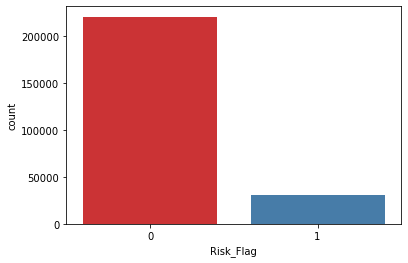

In [21]:
# checking distribution between target variables
sns.countplot(df['Risk_Flag'],palette='Set1')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married/Single', ylabel='count'>

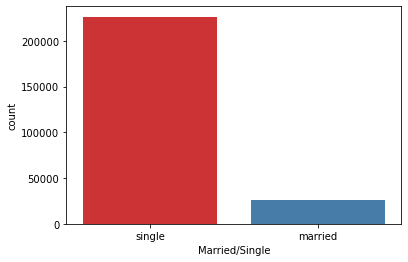

In [22]:
sns.countplot(df['Married/Single'],palette='Set1')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

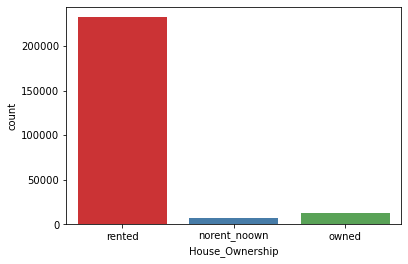

In [23]:
sns.countplot(df['House_Ownership'],palette='Set1')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

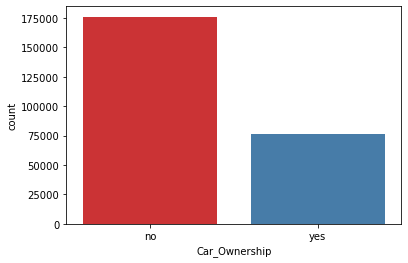

In [24]:
sns.countplot(df['Car_Ownership'],palette='Set1')

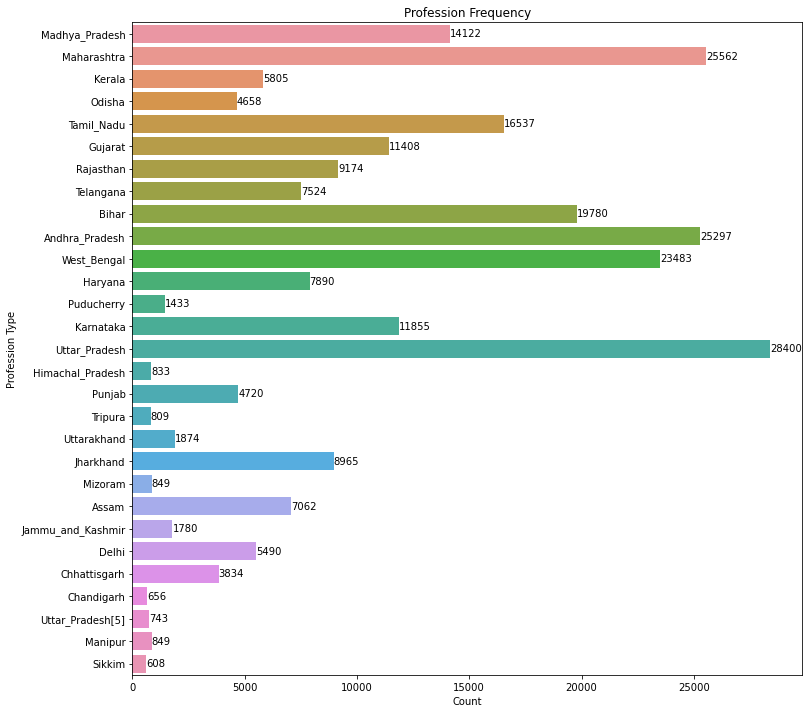

In [25]:
plt.figure(figsize=(12, 12))
ax = sns.countplot(y=df['STATE'])

plt.title("Profession Frequency")
plt.ylabel("Profession Type")
plt.xlabel("Count")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

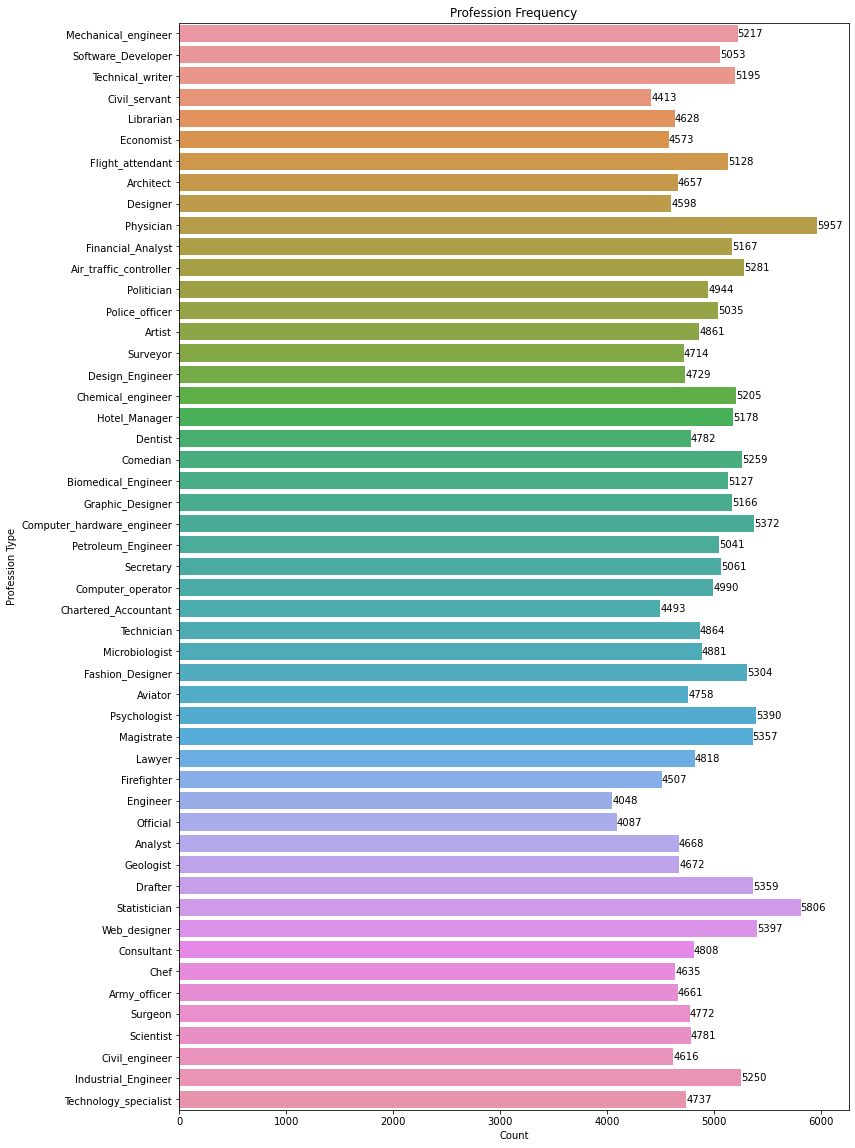

In [26]:
plt.figure(figsize=(12, 20))
ax = sns.countplot(y=df['Profession'])

plt.title("Profession Frequency")
plt.ylabel("Profession Type")
plt.xlabel("Count")

for container in ax.containers:
    ax.bar_label(container)
plt.show()

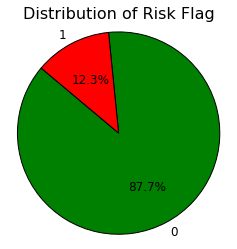

In [27]:
plt.figure(figsize=(4, 4))

counts = df['Risk_Flag'].value_counts().sort_values(ascending=False)
custom_colors = ['green', 'red']

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, 
        wedgeprops={'edgecolor': 'black', 'linewidth': 1}, textprops={'fontsize': 12})

plt.axis('equal')
plt.title('Distribution of Risk Flag', fontsize=16)
plt.show()


In target variable 12.3% of clients are high risk individuals & 87.7% of clients are low risk individuals.

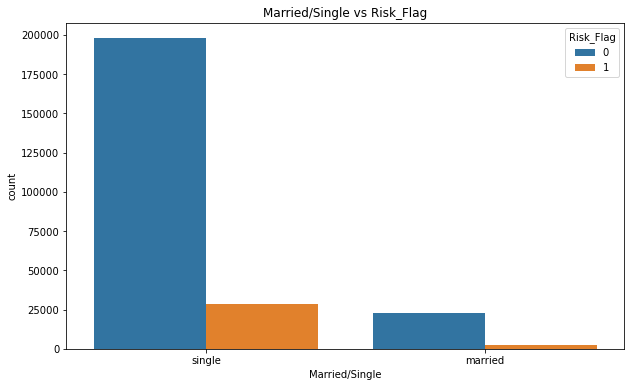

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df)
plt.title('Married/Single vs Risk_Flag')
plt.show()

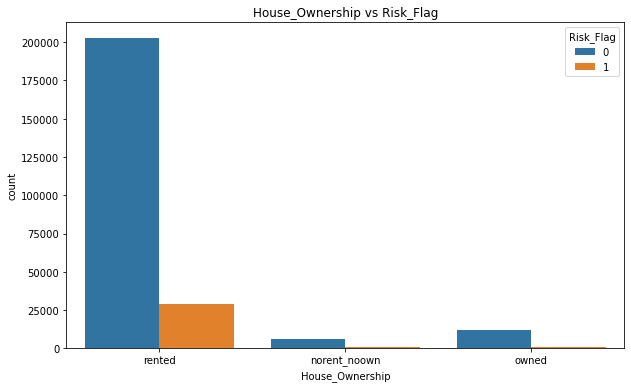

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df)
plt.title('House_Ownership vs Risk_Flag')
plt.show()

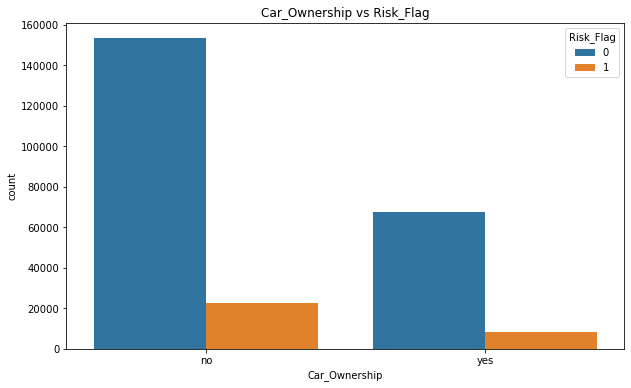

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=df)
plt.title('Car_Ownership vs Risk_Flag')
plt.show()

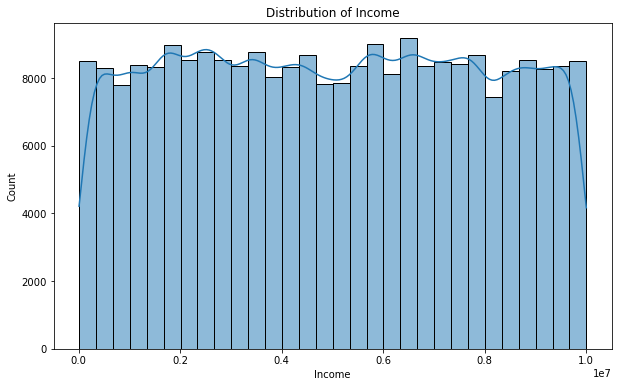

In [31]:
# Histogram of Income
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Distribution of Income')
plt.show()

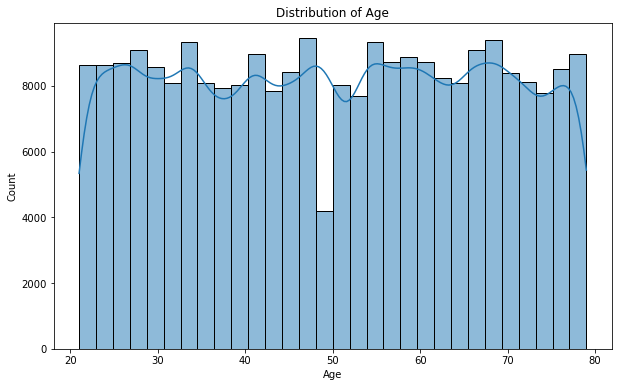

In [32]:
# Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

<AxesSubplot:>

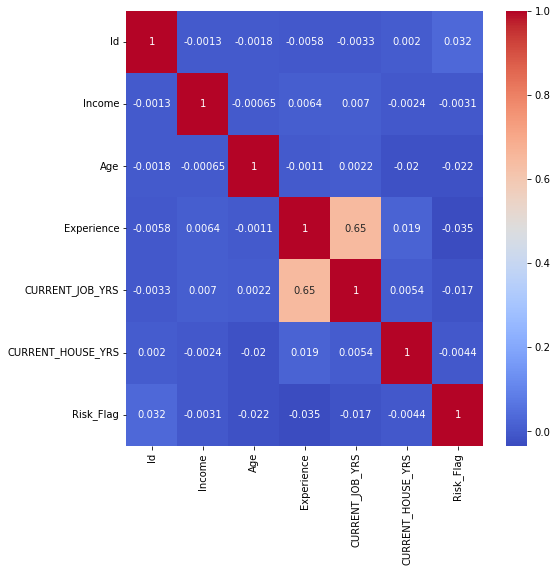

In [33]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [34]:
#Splitting the data into X and y
from sklearn.model_selection import train_test_split
X=df.drop('Risk_Flag',axis=1)
y=df['Risk_Flag']   
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_val,X_test,y_val,y_test=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

categorical_columns = X.select_dtypes(include=['object']).columns 

# Fit and transform categorical columns in training set
for col in categorical_columns:
    X_train[col] = le.fit_transform(X_train[col])

# Transform categorical columns in validation set, handle unknown labels
for col in categorical_columns:
    # Handle unknown labels by assigning them a default value (e.g., 0)
    X_val[col] = le.transform(X_val[col].map(lambda x: 0 if x not in le.classes_ else x))

# Transform categorical columns in testing set, handle unknown labels
for col in categorical_columns:
    # Handle unknown labels by assigning them a default value (e.g., 0)
    X_test[col] = le.transform(X_test[col].map(lambda x: 0 if x not in le.classes_ else x))

# Print the encoded datasets
print("X_train:")
print(X_train.head())

print("\nX_val:")
print(X_val.head())

print("\nX_test:")
print(X_test.head())


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = X.select_dtypes(include=['int64','float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical features in training set
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])

# Scale numerical features in validation set
X_val[numerical_features] = scaler.transform(X_val[numerical_features])

# Scale numerical features in testing set
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
X_train.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,1.024787,1.430422,1.170436,1.318759,1,2,0,4,270,20,-0.914084,-0.712569
92611,-0.457717,-0.820701,-0.644922,-1.680840,1,2,0,13,311,22,-1.736837,-0.712569
86397,-0.543127,-1.385148,-0.644922,-0.181041,1,2,0,42,123,23,-0.639833,0.717243
110500,-0.211838,-0.383000,-1.699001,-1.347551,1,2,0,48,295,1,-1.188335,0.002337
185133,0.813971,1.551521,-0.527803,-0.847618,1,0,1,50,56,11,-0.365582,0.717243


In [ ]:
# Remove the 'Id' column from all datasets
X_train = X_train.drop('Id', axis=1)
X_val = X_val.drop('Id', axis=1)
X_test = X_test.drop('Id', axis=1)

In [ ]:
#Saving the preprocessed data
X_train.to_csv('/Users/yogeshdhaliya/Desktop/Task/X_train.csv',index=False)
X_val.to_csv('/Users/yogeshdhaliya/Desktop/Task/X_val.csv',index=False)
X_test.to_csv('/Users/yogeshdhaliya/Desktop/Task/X_test.csv',index=False)
y_train.to_csv('/Users/yogeshdhaliya/Desktop/Task/y_train.csv',index=False)
y_val.to_csv('/Users/yogeshdhaliya/Desktop/Task/y_val.csv',index=False)
y_test.to_csv('/Users/yogeshdhaliya/Desktop/Task/y_test.csv',index=False)

In [3]:
import pandas as pd

# Load the preprocessed data
X_train = pd.read_csv("/Users/yogeshdhaliya/Desktop/Task/X_train.csv")
X_val = pd.read_csv('/Users/yogeshdhaliya/Desktop/Task/X_val.csv')
X_test = pd.read_csv('/Users/yogeshdhaliya/Desktop/Task/X_test.csv')
y_train = pd.read_csv('/Users/yogeshdhaliya/Desktop/Task/y_train.csv')
y_val = pd.read_csv('/Users/yogeshdhaliya/Desktop/Task/y_val.csv')
y_test = pd.read_csv('/Users/yogeshdhaliya/Desktop/Task/y_test.csv')

In [4]:
# Determine the number of classes in the target variable
n_classes = len(y_train['Risk_Flag'].unique())
print(f'Number of classes: {n_classes}')

Number of classes: 2


In [5]:
#maximum number of LDA components(Applying LDA)
max_components = n_classes - 1
print(f'Maximum number of LDA components: {max_components}')

Maximum number of LDA components: 1


In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Apply LDA
lda = LinearDiscriminantAnalysis(n_components=max_components)
# Fit LDA and transform the training data
X_train_lda = lda.fit_transform(X_train_scaled, y_train.values.ravel())
X_val_lda = lda.transform(X_val_scaled)
X_test_lda = lda.transform(X_test_scaled)

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Convert the transformed arrays back to DataFrames for easier inspection
X_train_lda_df = pd.DataFrame(X_train_lda, columns=[f'LDA{i+1}' for i in range(X_train_lda.shape[1])])
X_val_lda_df = pd.DataFrame(X_val_lda, columns=[f'LDA{i+1}' for i in range(X_val_lda.shape[1])])
X_test_lda_df = pd.DataFrame(X_test_lda, columns=[f'LDA{i+1}' for i in range(X_test_lda.shape[1])])
# Train and evaluate a classifier using the LDA-transformed data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_lda_df, y_train.values.ravel())
y_pred_val = clf.predict(X_val_lda_df)
y_pred_test = clf.predict(X_test_lda_df)
accuracy = accuracy_score(y_val, y_pred_val)
accuracy1=accuracy_score(y_test,y_pred_test)
print(f'Validation Accuracy with LDA: {accuracy}')
print(f'Test Accuracy with LDA: {accuracy1}')

Validation Accuracy with LDA: 0.720515873015873
Test Accuracy with LDA: 0.7209126984126984


In [13]:
#using smote to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_lda_df, y_train)
# Convert the transformed arrays back to DataFrames for easier inspection
X_train_smote = pd.DataFrame(X_train_smote, columns=[f'LDA{i+1}' for i in range(X_train_smote.shape[1])])

In [14]:
#Random forest with just train_scaled data
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train.values.ravel())
y_pred_val = clf.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred_val)
print(f'Validation Accuracy with just scaled data: {accuracy}')

Validation Accuracy with just scaled data: 0.8740079365079365


In [15]:
#using XGBoost
from xgboost import XGBClassifier
clf = XGBClassifier(random_state=42)
clf.fit(X_train_scaled, y_train.values.ravel())
y_pred_val = clf.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = clf.predict(X_test_scaled)
accuracy1=accuracy_score(y_test,y_pred_test)
print(f'Validation Accuracy with XGBoost: {accuracy}')
print(f'Test Accuracy with XGBoost: {accuracy1}')


Validation Accuracy with XGBoost: 0.8649206349206349
Test Accuracy with XGBoost: 0.8686111111111111


In [16]:
#Using XGBoost with LDA
clf = XGBClassifier(random_state=42)
clf.fit(X_train_lda_df, y_train.values.ravel())
y_pred_val = clf.predict(X_val_lda_df)
accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = clf.predict(X_test_lda_df)
accuracy1=accuracy_score(y_test,y_pred_test)
print(f'Validation Accuracy with XGBoost and LDA: {accuracy}')
print(f'Test Accuracy with XGBoost and LDA: {accuracy1}')

Validation Accuracy with XGBoost and LDA: 0.8703571428571428
Test Accuracy with XGBoost and LDA: 0.8740476190476191


In [17]:
#Using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train.values.ravel())
y_pred_val = clf.predict(X_val_scaled)
accuracy = accuracy_score(y_val, y_pred_val)
y_pred_test = clf.predict(X_test_scaled)
accuracy1=accuracy_score(y_test,y_pred_test)
print(f'Validation Accuracy with Logistic Regression: {accuracy}')
print(f'Test Accuracy with Logistic Regression: {accuracy1}')

Validation Accuracy with Logistic Regression: 0.8740079365079365
Test Accuracy with Logistic Regression: 0.8778571428571429


After trying out various ML models Random Forest Classifier & Logisitic Regression got the highest accuracy result.
I have got accuracy score of 87%